## Importing Libraries

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# CPU Time Relation

We know, 

### Expected processing time = no of instructions * CPI(avg.) /Clockrate

and since,
### CPI=Clock cycles for a program / Instructions count

So this implies, 
### Expected processing time = Clock cycles for a program / Clock rate

# Assumptions

Consider an implementation of MIPS(Million Instructions Per Second) ISA(Instruction Set Architecture)
<br>
each ALU instruction takes 3 clock cycles,
<br>
each branch/jump instruction takes 2 clock cycles,
<br>
each sw instruction takes 4 clock cycles,
<br>
each lw instruction takes 5 clock cycles
<br>
<br>
And further lets assume a program that during its execution executes:
<br>
x=200 million ALU instructions
<br>
y=55 million branch/jump instructions
<br>
z=25 million sw instructions
<br>
w=20 million lw instructions


## Expected Processing Time for whole program with sequential execution on single processors

### P1 (3.5 GHz):
Clock cycles for a program = (x * 3  + y * 2 + z * 4 + w * 5) = 910 * 10^6 clock cycles
<br>
<br>
Expected Processing Time = Clock cycles for a program / Clock rate
<br>
<br>
= 910 * 10^6 / 3.5 * 10^9 = 0.26 sec
<br>
<br>
### P2 (2 GHz):
Clock cycles for a program = (x * 3  + y * 2 + z * 4 + w * 5) = 910 * 10^6 clock cycles
<br>
<br>
Expected Processing Time = Clock cycles for a program / Clock rate
<br>
<br>
= 910 * 10^6 / 2 * 10^9 = 0.455 sec
<br>
<br>
### P3 (2.5 GHz):
Clock cycles for a program = (x * 3  + y * 2 + z * 4 + w * 5) = 910 * 10^6 clock cycles
<br>
<br>
Expected Processing Time = Clock cycles for a program / Clock rate
<br>
<br>
= 910 * 10^6 / 2.5 * 10^9 = 0.364 sec


### Now lets try breaking the instructions into 6 subtasks with parent child subtask assumption



### T1:
x=33 million ALU instructions
<br>
y=10 million branch/jump instructions
<br>
z=4 million sw instructions
<br>
w=4 million lw instructions
<br>
### T2:
x=33 million ALU instructions
<br>
y=9 million branch/jump instructions
<br>
z=5 million sw instructions
<br>
w=4 million lw instructions
<br>
### T3:
x=33 million ALU instructions
<br>
y=9 million branch/jump instructions
<br>
z=4 million sw instructions
<br>
w=3 million lw instructions
<br>
<br>
### T4:
x=33 million ALU instructions
<br>
y=9 million branch/jump instructions
<br>
z=4 million sw instructions
<br>
w=3 million lw instructions
<br>
### T5:
x=33 million ALU instructions
<br>
y=9 million branch/jump instructions
<br>
z=4 million sw instructions
<br>
w=3 million lw instructions
<br>
### T6:
x=35 million ALU instructions
<br>
y=9 million branch/jump instructions
<br>
z=4 million sw instructions
<br>
w=3 million lw instructions
<br>

## NOTE:
I'm breaking the overall instructions into 6 subsets, just for the purpose of demonstration,the actual segmentation and further allocation differs according to the instructions' type and the nature of the program

In [2]:
data={'P1':[0.044,0.044,0.042,0.042,0.042,0.044],
     'P2':[0.077,0.078,0.074,0.074,0.074,0.077],
     'P3':[0.062,0.062,0.059,0.059,0.059,0.061]}

EPT_Matrix = pd.DataFrame(data, index=['T1','T2','T3','T4','T5','T6'])
EPT_Matrix

,P1,P2,P3
T1,0.044,0.077,0.062
T2,0.044,0.078,0.062
T3,0.042,0.074,0.059
T4,0.042,0.074,0.059
T5,0.042,0.074,0.059
T6,0.044,0.077,0.061


# Assumption regarding latency

### FILL

# Visualizing Directed Acyclic Graph for subtasks

### Helper Function

In [3]:
def show_wgraph(custom_node_positions=None):
    plt.figure() 
    if custom_node_positions==None:
        pos = nx.spring_layout(G)
    else:
        pos=custom_node_positions
        
    weight_labels = nx.get_edge_attributes(G,'weight')
    nx.draw(G,pos,font_color = 'white', node_shape = 's', with_labels = True,)
    output = nx.draw_networkx_edge_labels(G,pos,edge_labels=weight_labels)


### Initiating subtask nodes and latency transitions

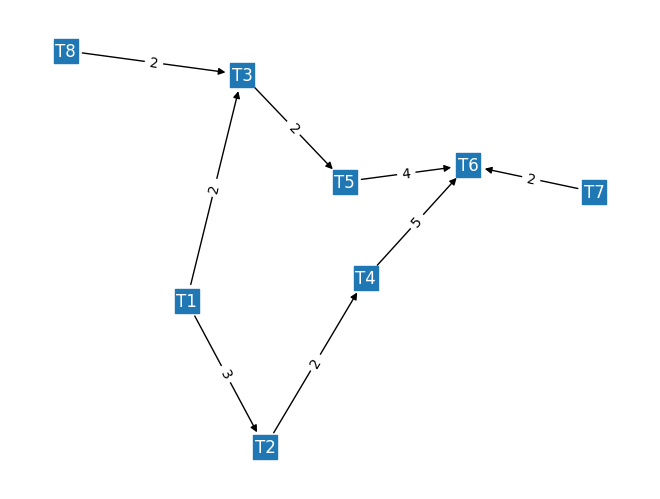

In [4]:
G = nx.DiGraph()

G.add_node('T1')
G.add_node('T2')
G.add_node('T3')
G.add_node('T4')
G.add_node('T5')
G.add_node('T6')

G.add_edge('T1', 'T2', weight=3)
G.add_edge('T1', 'T3', weight=2)
G.add_edge('T2', 'T4',weight=2)
G.add_edge('T3', 'T5', weight=2)
G.add_edge('T4', 'T6', weight=5)
G.add_edge('T5', 'T6', weight=4)
G.add_edge('T8', 'T3', weight=2)
G.add_edge('T7', 'T6', weight=2)



show_wgraph()
# [8, 7, 5, 2, 1, 3, 4, 6]


# Breadth First Search Sequence Order

In [5]:
root = 'T1'
edges = nx.bfs_edges(G, root)
nodes_b = [root] + [v for u, v in edges]
nodes_b

['T1', 'T2', 'T3', 'T4', 'T5', 'T6']

# Depth First Search Sequence Order

In [6]:
#DFS Execution Order
root='T1'
edges=nx.dfs_edges(G,root)
nodes=[root]+[v for u,v in edges]
nodes
#https://stackoverflow.com/questions/14259233/graph-traversal-with-networkx-python (custom traversal)

['T1', 'T2', 'T4', 'T6', 'T3', 'T5']

# Topological Sort Sequence Order

In [7]:
nx.is_directed_acyclic_graph(G)

True

In [8]:
nodes=list(nx.topological_sort(G))
nodes

['T1', 'T8', 'T7', 'T2', 'T3', 'T4', 'T5', 'T6']

In [9]:
import sys

In [10]:
nodes

['T1', 'T8', 'T7', 'T2', 'T3', 'T4', 'T5', 'T6']

In [11]:
data={'T1':[0,2,3,0,0,0,0,0],
     'T2':[0,0,0,2,0,0,0,0],
     'T3':[0,0,0,0,1,0,0,0],
     'T4':[0,0,0,0,0,1,0,0],
     'T5':[0,0,0,0,0,2,0,0],
     'T6':[0,0,0,0,0,0,0,0],
     'T7':[0,0,0,0,0,2,0,0],
     'T8':[0,0,2,0,0,2,0,0]
     }

latency = pd.DataFrame(data, index=['T1','T2','T3','T4','T5','T6','T7','T8']).transpose()
latency

,T1,T2,T3,T4,T5,T6,T7,T8
T1,0,2,3,0,0,0,0,0
T2,0,0,0,2,0,0,0,0
T3,0,0,0,0,1,0,0,0
T4,0,0,0,0,0,1,0,0
T5,0,0,0,0,0,2,0,0
T6,0,0,0,0,0,0,0,0
T7,0,0,0,0,0,2,0,0
T8,0,0,2,0,0,2,0,0


In [12]:
data={'P1':[0.044,0.044,0.042,0.042,0.042,0.044,0.044,0.042],
     'P2':[0.077,0.078,0.074,0.074,0.074,0.077,0.077,0.075],
     'P3':[0.062,0.062,0.059,0.059,0.059,0.061,0.058,0.061]}

EPT_Matrix = pd.DataFrame(data, index=['T1','T2','T3','T4','T5','T6','T7','T8'])
EPT_Matrix

,P1,P2,P3
T1,0.044,0.077,0.062
T2,0.044,0.078,0.062
T3,0.042,0.074,0.059
T4,0.042,0.074,0.059
T5,0.042,0.074,0.059
T6,0.044,0.077,0.061
T7,0.044,0.077,0.058
T8,0.042,0.075,0.061


In [13]:
EPT_Matrix

,P1,P2,P3
T1,0.044,0.077,0.062
T2,0.044,0.078,0.062
T3,0.042,0.074,0.059
T4,0.042,0.074,0.059
T5,0.042,0.074,0.059
T6,0.044,0.077,0.061
T7,0.044,0.077,0.058
T8,0.042,0.075,0.061


In [14]:
EPT_Matrix.idxmin(axis=1)

T1    P1
T2    P1
T3    P1
T4    P1
T5    P1
T6    P1
T7    P1
T8    P1
dtype: object

In [15]:
processors=3
tasks=6

In [16]:
def is_entry_task(task):
    delay=latency.index[latency['T'+str(task)] > 0].tolist()
    if not delay:
        return 1
    return 0

In [17]:
latency['T1']['T2']

0

In [18]:
nodes

['T1', 'T8', 'T7', 'T2', 'T3', 'T4', 'T5', 'T6']

In [19]:
def max_pred(task,final_order):
    predecessors=latency.index[latency['T'+str(task)] > 0].tolist()
    
    if not predecessors:
        return 0

    maxTime=-sys.maxsize-1
    for pred_task,pred_value in final_order.items():
        if pred_task in predecessors and maxTime <pred_value[1]:
                maxTime=pred_value[1]
    return maxTime
    
   
    
final_order={'T1': ['P1', 0.044],'T8': ['P2', 0.042],'T7': ['P3', 0.054],'T2': ['P4', 0.041]}    
max_pred(2,final_order)

0.044

In [20]:
final_order={}
p_clock=[0]*processors

for i in range(tasks):
    task=nodes[i][1:2]
    minCost=sys.maxsize
    processor_used=0
    
    for processor in range(processors): 
        predecessor_completion_time=max_pred(task,final_order)
        present_processor_time=p_clock[processor]
        max_time= max(predecessor_completion_time,present_processor_time)
        
        burst_time=EPT_Matrix['P'+str(processor+1)]['T'+str(task)]
        
        total_time=max_time+burst_time
#         print("Using Processor "+str(processor+1)+" for task "+str(task)+":")
#         print("pred_time : "+str(predecessor_completion_time))
#         print("present time: "+str(present_processor_time))
#         print("max_time: "+str(max_time))
#         print("burst_time: "+str(burst_time))
#         print("total time: "+str(total_time))
#         print("\n")
        
        if(total_time<minCost):
            minCost=total_time
            processor_used=processor
#     print("PROCESSOR "+str(processor_used+1)+" USED WITH "+str(minCost)+" TIME\n")   
    p_clock[processor_used]+=minCost
    final_order.update({'T'+str(task): [processor_used+1,minCost]})
    print("processor "+str(processor_used+1)+" takes minimum time of "+str(minCost)+" time units for task "+str(task)+
          " and ends at "+str(p_clock[processor])+" time unit ")
print("\n")
print(p_clock)
print(final_order)

processor 1 takes minimum time of 0.044 time units for task 1 and ends at 0 time unit 
processor 3 takes minimum time of 0.061 time units for task 8 and ends at 0.061 time unit 
processor 2 takes minimum time of 0.077 time units for task 7 and ends at 0.061 time unit 
processor 1 takes minimum time of 0.088 time units for task 2 and ends at 0.061 time unit 
processor 3 takes minimum time of 0.12 time units for task 3 and ends at 0.181 time unit 
processor 2 takes minimum time of 0.16199999999999998 time units for task 4 and ends at 0.181 time unit 


[0.132, 0.239, 0.181]
{'T1': [1, 0.044], 'T8': [3, 0.061], 'T7': [2, 0.077], 'T2': [1, 0.088], 'T3': [3, 0.12], 'T4': [2, 0.16199999999999998]}


In [43]:
import sys
import pandas as pd

graph=[]
vertices=[]
vertices_no=0

def add_vertex(v):
    global graph
    global vertices_no
    global vertices
    if v in vertices:
        print("Vertex",v,"already exists")
    else:
        vertices_no=vertices_no+1
        vertices.append(v)
        if vertices_no >1:
            for vertex in graph:
                vertex.append(0)
        temp=[]
        for i in range(vertices_no):
            temp.append(0)
        graph.append(temp)
    
def add_edge(v1,v2,e):
    global graph
    global vertices_no
    global vertices
    
    if v1 not in vertices:
        print("Vertex ",v1,"doesn't exist.")
    elif v2 not in vertices:
        print("Vertex ",v2,"doesn't exist.")
    else:
        index1=vertices.index(v1)
        index2=vertices.index(v2)
        graph[index1][index2]=e


def print_graph():
    global graph
    global vertices_no
    for i in range(vertices_no):
        for j in range(vertices_no):
            if graph[i][j]!=0:
                print(vertices[i],"-> ",vertices[j]," edge weight: ",graph[i][j])
                

def generate_graph(tasks,edges):
    global graph
    for task in range(tasks):
        add_vertex('T'+str(task+1))
    for edge in edges:
        add_edge(edge[0],edge[1],edge[2])
    return graph
                

# Expected processing time = no of instructions * CPI(avg.) /Clockrate
def calculate_processing_times(processors,tasks,processor_clock_speed,instruction_per_task,CPI):
    expected_processing_times={}
    for processor in range(processors):
        task_processing_time=[]
        for task in range(tasks):
            processing_time=(instruction_per_task *CPI)/(processor_clock_speed[processor]*pow(10,9))
            processing_time=round(processing_time, 3)
            task_processing_time.append(processing_time)
        expected_processing_times.update({'P'+str(processor+1):task_processing_time})
    return expected_processing_times

def max_predecessor(task,final_order):
    predecessors=latency.index[latency['T'+str(task)] > 0].tolist()
    
    if not predecessors:
        return 0

    maxTime=-sys.maxsize-1
    for pred_task,pred_value in final_order.items():
        if pred_task in predecessors and maxTime <pred_value[1]:
                maxTime=pred_value[1]
    return maxTime
    

def schedule_tasks(processors,tasks,sequence_order,latency,EPT_Matrix):
    final_order={}
    p_clock=[0]*processors

    for i in range(tasks):
        task=sequence_order[i][1:2]
        minCost=sys.maxsize
        processor_used=0
    
        for processor in range(processors): 
            predecessor_completion_time=max_predecessor(task,final_order)
            present_processor_time=p_clock[processor]
            max_time= max(predecessor_completion_time,present_processor_time)
        
            burst_time=EPT_Matrix['P'+str(processor+1)]['T'+str(task)]
        
            total_time=max_time+burst_time
#             print("Using Processor "+str(processor+1)+" for task "+str(task)+":")
#             print("pred_time : "+str(predecessor_completion_time))
#             print("present time: "+str(present_processor_time))
#             print("max_time: "+str(max_time))
#             print("burst_time: "+str(burst_time))
#             print("total time: "+str(total_time))
#             print("\n")

            if(total_time<minCost):
                minCost=total_time
                processor_used=processor
#         print("PROCESSOR "+str(processor_used+1)+" USED WITH "+str(minCost)+" TIME\n")   
        minCost=round(minCost,3)
        p_clock[processor_used]+=minCost
        final_order.update({'T'+str(task): [processor_used+1,minCost]})
        print("processor "+str(processor_used+1)+" takes minimum time of "+str(minCost)+" time units for task "+str(task)+
          " and ends at "+str(p_clock[processor_used])+" time unit ")
    print("\n")
    print("Individual time taken by processors are "+str(p_clock)+"\n")
    print("Total time taken for all tasks : "+str(max(p_clock))+" time units\n")
    print(str(final_order)+"\n")
    print("")



    
    

In [44]:
tasks=8
processors=3
processor_clock_speed= [3.5,2,2.5] #In GHz
instruction_count= 300 * pow(10,6) 
CPI=4
edges=[['T1','T2',3],
       ['T1','T3',2],
       ['T2','T4',2],
       ['T3','T5',2],
       ['T4','T6',5],
       ['T5','T6',4],
       ['T8','T3',2],
       ['T7','T6',2]]


#-------------------------------------------------

adj_matrix=generate_graph(tasks,edges)

#Currently latency data is used to check for predecessors, but delay is not currently added
latency_data={}
for task in range(tasks):
    latency_data.update({'T'+str(task+1):adj_matrix[task]})
latency = pd.DataFrame(latency_data, index=vertices).transpose()

instruction_per_task= instruction_count/tasks
expected_processing_times=calculate_processing_times(processors,tasks,processor_clock_speed,instruction_per_task,CPI)
EPT_Matrix = pd.DataFrame(expected_processing_times, index=vertices)

# sequence_order=generate_sequence()
sequence_order=['T1', 'T8', 'T7', 'T2', 'T3', 'T4', 'T5', 'T6']
schedule_tasks(processors,tasks,sequence_order,latency,EPT_Matrix)

processor 1 takes minimum time of 0.043 time units for task 1 and ends at 0.043 time unit 
processor 3 takes minimum time of 0.06 time units for task 8 and ends at 0.06 time unit 
processor 2 takes minimum time of 0.075 time units for task 7 and ends at 0.075 time unit 
processor 1 takes minimum time of 0.086 time units for task 2 and ends at 0.129 time unit 
processor 3 takes minimum time of 0.12 time units for task 3 and ends at 0.18 time unit 
processor 2 takes minimum time of 0.161 time units for task 4 and ends at 0.236 time unit 
processor 1 takes minimum time of 0.172 time units for task 5 and ends at 0.301 time unit 
processor 3 takes minimum time of 0.24 time units for task 6 and ends at 0.42 time unit 


Individual time taken by processors are [0.301, 0.236, 0.42]

Total time taken : 0.42 time units

{'T1': [1, 0.043], 'T8': [3, 0.06], 'T7': [2, 0.075], 'T2': [1, 0.086], 'T3': [3, 0.12], 'T4': [2, 0.161], 'T5': [1, 0.172], 'T6': [3, 0.24]}



In [ ]:
tasks=8
processors=3
processor_clock_speed= [3.5,2,2.5] #In GHz
instruction_count= 300 * pow(10,6) 
CPI=4
edges=[['T1','T2',3],
       ['T1','T3',2],
       ['T2','T4',2],
       ['T3','T5',2],
       ['T4','T6',5],
       ['T5','T6',4],
       ['T8','T3',2],
       ['T7','T6',2]]


latency_data={'T1':[0,2,3,0,0,0,0,0], #adjacency matrix
     'T2':[0,0,0,2,0,0,0,0],
     'T3':[0,0,0,0,1,0,0,0],
     'T4':[0,0,0,0,0,1,0,0],
     'T5':[0,0,0,0,0,2,0,0],
     'T6':[0,0,0,0,0,0,0,0],
     'T7':[0,0,0,0,0,2,0,0],
     'T8':[0,0,2,0,0,2,0,0]
     }
latency = pd.DataFrame(latency_data, index=['T1','T2','T3','T4','T5','T6','T7','T8']).transpose()
#Currently latency data is used to check for predecessors, but delay is not currently added


instruction_per_task= instruction_count/tasks
expected_processing_times=calculate_processing_times(processors,tasks,processor_clock_speed,instruction_per_task,CPI)
EPT_Matrix = pd.DataFrame(expected_processing_times, index=['T1','T2','T3','T4','T5','T6','T7','T8'])


sequence_order=['T1', 'T8', 'T7', 'T2', 'T3', 'T4', 'T5', 'T6']




schedule_tasks(processors,tasks,sequence_order,latency,EPT_Matrix)

In [ ]:
def add_vertex(v):
    global graph
    global vertices_no
    global vertices
    if v in vertices:
        print("Vertex",v,"already exists")
    else:
        vertices_no=vertices_no+1
        vertices.append(v)
        if vertices_no >1:
            for vertex in graph:
                vertex.append(0)
        temp=[]
        for i in range(vertices_no):
            temp.append(0)
        graph.append(temp)
    
def add_edge(v1,v2,e):
    global graph
    global vertices_no
    global vertices
    
    if v1 not in vertices:
        print("Vertex ",v1,"doesn't exist.")
    elif v2 not in vertices:
        print("Vertex ",v2,"doesn't exist.")
    else:
        index1=vertices.index(v1)
        index2=vertices.index(v2)
        graph[index1][index2]=e


def print_graph():
    global graph
    global vertices_no
    for i in range(vertices_no):
        for j in range(vertices_no):
            if graph[i][j]!=0:
                print(vertices[i],"-> ",vertices[j]," edge weight: ",graph[i][j])
                

In [ ]:
vertices=[]
vertices_no=0
graph=[]
tasks=8
vertex_list=['T'+str(task+1) for task in range(tasks)]
for task in vertex_list:
    add_vertex(task)

add_edge('T1','T2',3)
add_edge('T1','T3',2)
add_edge('T2','T4',2)
add_edge('T3','T5',2)
add_edge('T4','T6',5)
add_edge('T5','T6',4)
add_edge('T8','T3',2)
add_edge('T7','T6',2)

print_graph()
print("\n")
print(vertices)
graph


In [ ]:
len(vertices)

In [ ]:
def topological_sort_helper(V,visited,stack):
    visited[V]=True
    
    for i in graph[V]:
        if visited[i]==False:
            topological_sort_helper(i,visited,stack)
    stack.append(V+1)
    
def topological_sort():
    visited=[False]*len(vertices)
    stack=[]
    
    for i in range(len(vertices)):
        if visited[i]==False:
            topological_sort_helper(i,visited,stack)
    
    print(stack[::-1])
    
topological_sort()
sequence_order=['T1', 'T8', 'T7', 'T2', 'T3', 'T4', 'T5', 'T6']

# [8, 7, 5, 2, 1, 3, 4, 6]

# Gantt Chart Sample

In [ ]:
import matplotlib.pyplot as plt

fig, gnt = plt.subplots()

gnt.set_ylim(0, 50)

gnt.set_xlim(0, 160)

gnt.set_xlabel('Seconds since start')
gnt.set_ylabel('Processors')

gnt.set_yticks([15, 25, 35])
gnt.set_yticklabels(['1', '2', '3'])

gnt.grid(True)

gnt.broken_barh([(40, 50)], (30, 9), facecolors =('tab:orange'))

gnt.broken_barh([(150, 10)], (10, 9),facecolors ='tab:blue')

gnt.broken_barh([(10, 50)], (20, 9),facecolors =('tab:red'))
gnt.broken_barh([(110, 10)], (10, 9), facecolors =('tab:pink'))
gnt.broken_barh([(100, 20)], (20, 9), facecolors =('tab:green'))
gnt.broken_barh([(130, 10)], (20, 9), facecolors =('tab:green'))
plt.show()
